# Лабораторная работа №3. Компьютерная геометрия.
Подмогильный Иван Александрович 

## Задание №1

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import animation as animation
from rotations import xy_rotation, center_rotation
import matplotlib.patches as mpatches

In [2]:
def myplot(x, y):
    fig = plt.figure( figsize=(10, 10) )
    ax = fig.add_subplot(1, 1, 1)
    ax.set_aspect('equal')
    ax.grid()
    ax.plot(x, y)

def rot_mat(delta):
    return np.array([[np.cos(delta), np.sin(delta)],
                   [-np.sin(delta), np.cos(delta)]])

In [3]:
th = np.linspace(0, np.pi*2, 1000)

def conventional_circle(th):
    # Conventional circle definition
    r = 2
    x = np.array(r * np.cos(th))
    y = np.array(r * np.sin(th))
    return x, y


def optimized_circle(th):
    # Optimized circle definition
    xy = np.zeros([1000, 2])
    xy[0] = np.array([1, 0])
    delta = 2 * np.pi / 1000
    rot = rot_mat(delta)

    for i in range(1, 1000):
        xy[i] = xy[i-1] @ rot

    return xy


In [4]:
%%timeit -t
x, y = conventional_circle(th)

103 µs ± 29.1 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [5]:
x, y = conventional_circle(th)


In [6]:
%%timeit -t
xy = optimized_circle(th)

4.08 ms ± 1.26 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [7]:
xy = optimized_circle(th)


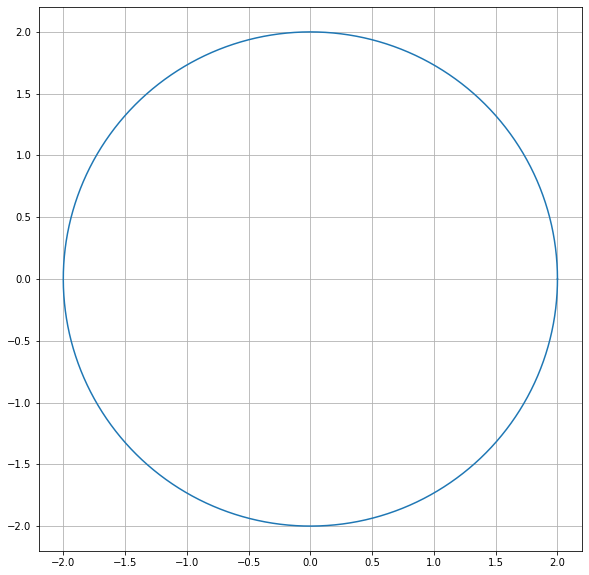

In [8]:
myplot(x, y)

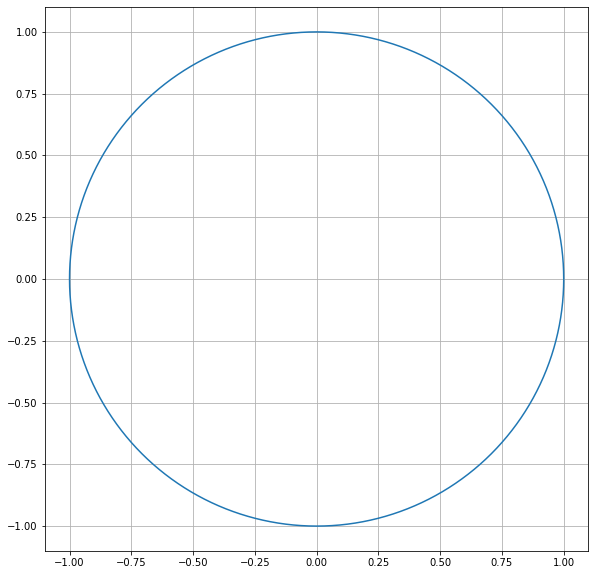

In [9]:
myplot(xy[:, 0], xy[:, 1])

## Задание №2

1. Нарисовать эпитрохоиду или гипотрохоиду используя параметрические уравнения этих кривых.
2. Нарисовать эпитрохоиду или гипотрохоиду используя лишь повороты точек катящейся окружности.
3. Рисунок 7 показывает из каких поворотов состоит перемещение точки циклоидальной кривой 𝑃.
Вначале точка 𝑃 поворачивается вокруг центра большой окружности 𝑂 на угол 𝜑 и переходит
в точку 𝑃𝜑. Затем 𝑃𝜑 поворачивается вокруг центра 𝑜𝜑 на угол 𝜃. Ваша задача заключается
в том, чтобы правильно вычислить угол 𝜃. Он полностью определяется углом 𝜑 и радиусами
окружностей 𝑅 и 𝑟.

Формула для параметрического задания:
$ 𝑥(𝑡) = 𝑅(1 − 𝑘) cos(𝑘𝑡) + 𝑑 cos((1 − 𝑘)𝑡) $
$ 𝑦(𝑡) = 𝑅(1 − 𝑘) sin(𝑘𝑡) − 𝑑 sin((1 − 𝑘)𝑡) $

Чтобы выяснить, где находится центр малой окружности, воспользуемся обычными $sin$ и $cos$

![Пояснение](explanationo.jpg)

In [10]:
def parametric1_hyp(r, R, d):
    # TODO: NEEDS REFACTORING. I USE THE FUNCTION parametric2_hyp() IN THE MEANTIME
    k = R / r
    fi = np.linspace(0, np.pi * 2, 1000)
    t = fi / k
    x = np.array( R * (1 - k) * np.cos(k * t) + d * np.cos((1 - k) * t) )
    y = np.array( R * (1 - k) * np.sin(k * t) - d * np.sin((1 - k) * t) )
    return x, y

def parametric2_hyp(r, R, d, cycles=1):
    """
    Получаем эпитрохоиду параметрически.
    :param r: радиус малой окружности
    :param R: радиус большой окружности
    :param d: расстояние от центра малой окружности до точки, которая будет рисовать
    :param cycles: количество повторов (увеличение или уменьшение размера fi)
    :return: кортеж из значений по x и по y
    """
    fi = np.linspace(0, np.pi * 2 * cycles, 1000)
    x = (R - r) * np.cos(fi) + d * np.cos( (R - r) / r * fi )
    y = (R - r) * np.sin(fi) - d * np.sin( (R - r) / r * fi )
    return x, y

def rotation_hyp(r, R, d, cycles=2):
    """
    Получаем эпитрохоиду вращением
    :param r: радиус малой окружности
    :param R: радиус большой окружности
    :param d: расстояние от центра малой окружности до точки, которая будет рисовать
    :return: np.array из значений x и y.
    """
    # Angle for big circle
    delta = 2 * np.pi / 1000 * cycles
    xy = np.zeros([1000, 2])
    xy[0] = np.array([R - r + d, 0])
    len_ = R * delta
    out_xy = np.zeros([1000, 2])
    centers = [[R - r, 0]]

    # Angle for small circle
    theta = len_ / r

    for i in range(1, 1000):
        # print("Rotation matrix is the following:", rot_mat(delta*i))
        # print("The angle in rad is following:", delta*i)
        
        # Вращаем сначала вокруг большой окружности. 
        out_rotated = xy[0] @ rot_mat(delta * i)
        out_xy[i] = out_rotated
        # print(out_rotated)
        hypot = np.hypot(out_rotated[0], out_rotated[1])
        # Найдём центр малой окружности на данный момент (через sin и cos)
        in_x = (R - r) * out_rotated[0] / hypot
        in_y = (R - r) * out_rotated[1] / hypot
        centers.append([in_x, in_y])
        
        # Вращаем вокруг малой окружности, используя уже определённую функцию. 
        in_rotated = xy_rotation(out_rotated, [in_x, in_y], rad=(theta * i))
        # print(in_rotated)
        xy[i] = in_rotated
    return xy, out_xy, centers


## Построение по ранее заданной формуле:


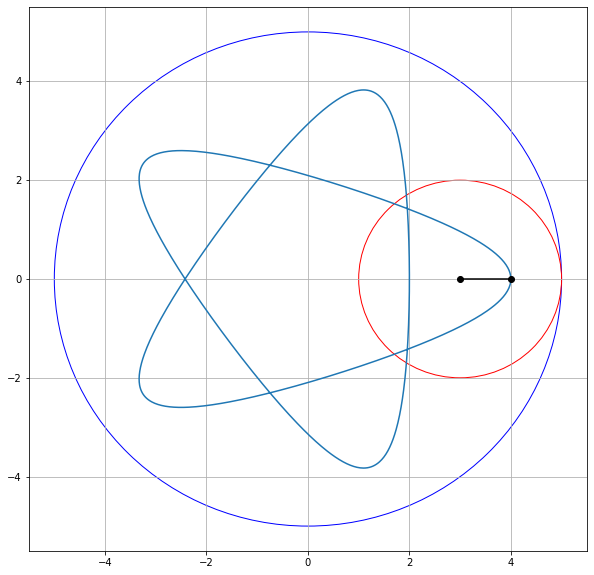

In [11]:
x, y = parametric2_hyp(2, 5, 1, 2)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid()

circle_out = mpatches.Circle([0, 0], 5, color="blue", fill=False)
circle_in = mpatches.Circle([3, 0], 2, color="red", fill=False)
ax.add_patch(circle_out)
ax.add_patch(circle_in)

ax.plot(x, y)
ax.plot([3, 4], [0, 0], marker='o', color='black')


## Построоение эпитрохоиды вращением окружности.


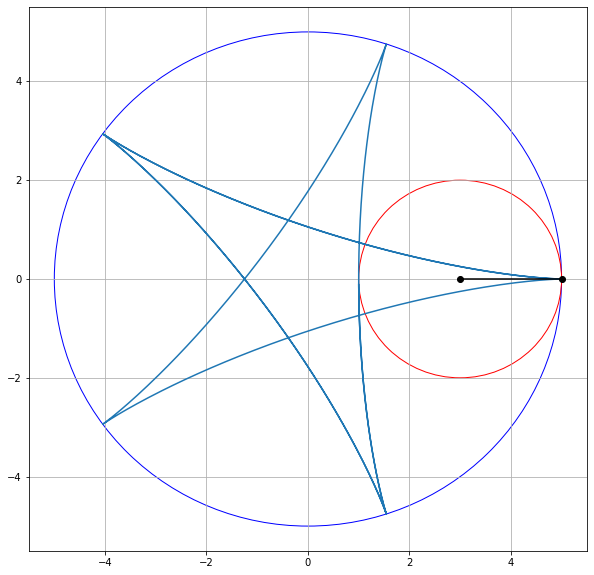

In [12]:
xy, out, centers = rotation_hyp(2, 5, 2, 3)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1)
ax.grid()

circle_out = mpatches.Circle([0, 0], 5, color="blue", fill=False)
circle_in = mpatches.Circle([3, 0], 2, color="red", fill=False)
ax.add_patch(circle_out)
ax.add_patch(circle_in)

ax.plot(xy[:, 0], xy[:, 1])
ax.plot([3, xy[0][0]], [0, xy[0][1]], marker='o', color='black')

# Задание №3
Создать видеоролик с анимацией циклоидальной кривой, нарисованной в предыдущем задании.

Для создания видеоролика будем использовать `animations` из `matplotlib`.


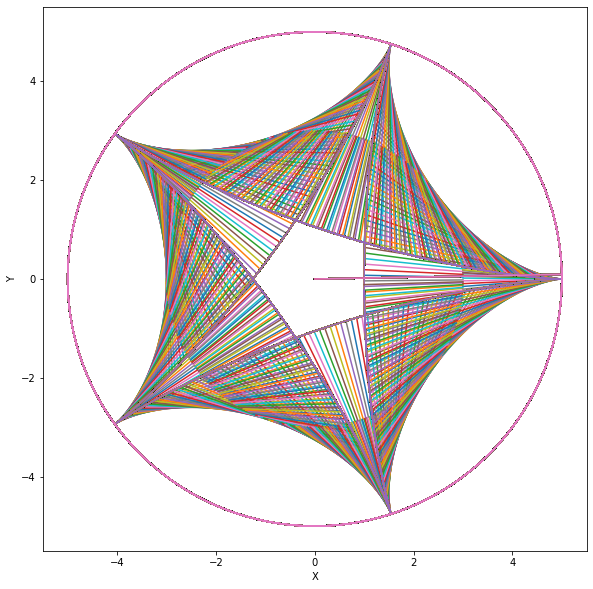

In [16]:
fig = plt.figure(figsize=(10,10))
plt.axes().set_aspect('equal')
plt.xlabel('X')
plt.ylabel('Y')

freq = 1000
lns = []

for i in range(1, freq):
    hypotr, = plt.plot(xy[:i, 0], xy[:i, 1])
    line, = plt.plot([centers[i][0], xy[i][0]], [centers[i][1], xy[i][1]])
    # Внешняя окружность должна быть постоянной
    out_circle, = plt.plot(out[:, 0], out[:, 1])
    
    lns.append([hypotr, line, out_circle])

In [17]:
lns

[[<matplotlib.lines.Line2D at 0x7f86b82f62e0>,

In [19]:
ani = animation.ArtistAnimation(fig, lns, interval=50)
print("Animation saving success...")
# ani.save('cycloid_ArtistAnimation.mp4', writer='ffmpeg')
ani.save('cycloid_ArtistAnimation.gif', writer='imagemagick')
ani

Animation saving success...


CalledProcessError: Command '['convert', '-size', '720x720', '-depth', '8', '-delay', '5.0', '-loop', '0', 'rgba:-', 'cycloid_ArtistAnimation.gif']' died with <Signals.SIGKILL: 9>.